In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.precision", 4)

%matplotlib inline

In [ ]:
import gzip
content = "Lots of content here"
f = gzip.open('Onlyfinnaly.log.gz', 'wb')
f.write(content)
f.close()

In [ ]:
import gzip
f=gzip.open('Onlyfinnaly.log.gz','rb')
file_content=f.read()
print file_content

In [44]:
df = pd.read_csv("main_data.csv")
df

,ID_CDI_I,ID_CDI_II,Word_NW,Word_CDI,Translation,AoA,VSoA,Lex_cat,Broad_lex,Freq,CDS_freq
0,i_4_1,i_1_1,'au','au','ouch',16.0,40.0,sound effects,nominals,4.3660e+03,7.0
1,i_4_2,i_1_2,'bææ','bææ','baa baa',15.0,40.0,sound effects,nominals,1.8000e+01,5.0
2,i_4_3,i_1_3,'brrr (bil-lyd)','brrr (bil-lyd)','vroom',13.0,20.0,sound effects,nominals,NaN,20.0
3,i_4_4,i_1_4,'gakk gakk','gakk gakk','quack quack',17.0,40.0,sound effects,nominals,1.6000e+01,3.0
4,i_4_5,i_1_5,'grr','grr','grr',22.0,220.0,sound effects,nominals,7.8000e+01,1.0
...,...,...,...,...,...,...,...,...,...,...,...
726,NaN,i_22_5,'hvis','hvis','if',35.0,660.0,closed-class items,closed-class,4.9853e+05,86.0
727,NaN,i_22_6,'men','men','but',33.0,600.0,closed-class items,closed-class,3.0154e+06,444.0
728,NaN,i_22_7,'og','og','and',25.0,400.0,closed-class items,closed-class,1.6080e+07,1074.0
729,NaN,i_22_8,'så','så','then',31.0,580.0,closed-class items,closed-class,2.1417e+06,900.0


In [45]:
df['Translation'] = df['Translation'].astype(str).str.replace("[']", "", regex=True)

- IDCDII: Word ID from the Norwegian adaptation of the MacArthur-Bates Communicative Development Inventories, version 1
- IDCDIII: Word ID from the Norwegian adaptation of the MacArthur-Bates Communicative Development Inventories, version 2
- Word_NW: The word in Norwegian
- Word_CDI: The form of the word found in the Norwegian adaptation of the MacArthur-Bates Communicative Development Inventories
- Translation: the English translation of the Norwegian word
- AoA: how old a child generally is was when they this this word, in months (Estimated from the MacArthur-Bates Communicative Development Inventories)
- VSoA: how many other words a child generally knows when they learn this word (rounded up to the nearest 10)
- Lex_cat: the specific part of speech of the word
- Broad_lex: the broad part of speech of the word
- Freq: a measure of how commonly this word occurs in Norwegian
- CDS_Freq: a measure of how commonly this word occurs when a Norwegian adult is talking to a Norwegian child

In [46]:
# Descripotion of Dataframe numerical variables (AoA, VSoA)

# how old a child generally is was when they this this word, in months
# how many other words a child generally knows when they learn this word (rounded up to the nearest 10)
df[['AoA', 'VSoA']].describe()

,AoA,VSoA
count,695.0000,704.0000
mean,25.2288,365.6534
std,4.3421,173.6050
min,12.0000,20.0000
25%,23.0000,235.0000
50%,25.0000,360.0000
75%,28.0000,500.0000
max,36.0000,680.0000


In [47]:
# Word speech categories
d = {'Broad speech categories': df['Broad_lex'].unique(), 'Specific speech categories': df['Lex_cat'].unique()}
cat_vars = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in d.items()]))
cat_vars

,Broad speech categories,Specific speech categories
0,nominals,sound effects
1,games & routines,common nouns
2,predicates,places to go
3,NaN,people
4,closed-class,games & routines
5,NaN,action words
6,NaN,descriptive words
7,NaN,NaN
8,NaN,closed-class items


In [48]:
# drop first columns as they're dentification of the words or the word in original language

df.drop(columns=['ID_CDI_I', 'ID_CDI_II', 'Word_NW', 'Word_CDI'], inplace=True)

# Replace categorical NaN's by 'unknown'
df['Lex_cat'].fillna('unknown',inplace=True)
df['Broad_lex'].fillna('unknown',inplace=True)

# select only cells that contain information of AoA and VSoA because there is no proper way to fill the gaps because of the
# nature of the words, regarding age and development. "toast" is much more simpler than "yourself" in a developmental 
# point of view
df = df[(df.AoA.isna() != True) & (df.VSoA.isna() != True)].copy()

# Replace the rest of the numeric variables NaN 
# using interpolation method. Which takes the average of the cells above and below.
df.interpolate(inplace=True)

## EDA

In [49]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

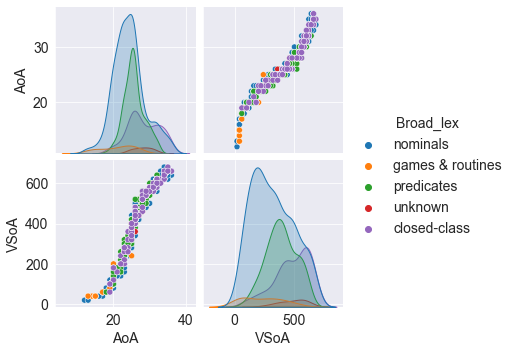

In [50]:
sns.pairplot(df.drop(columns=['Freq', 'CDS_freq']), hue='Broad_lex');

In the above graph we can explore how the different words distribute across categories. It's notorious that closed-class words such as "that" and "the" appear late at around 20 months but they form the mayority of learned words later on. We can also observe there is a big aggregation of new words (AoA) and already known words by the age they learn them (VSoA) at around 18 to 30 months. Which is what is commonly known as the "language explosion" also typically seen in english speaking countries at around 18 to 30 months

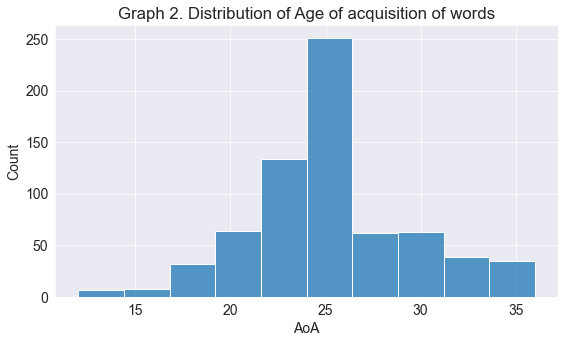

In [51]:
sns.histplot(df['AoA'], bins=10,);
plt.title("Graph 2. Distribution of Age of acquisition of words");

This graph shows the distribution of learned words by age showing the mayority of words being learned at around 18 to 30 months of age.

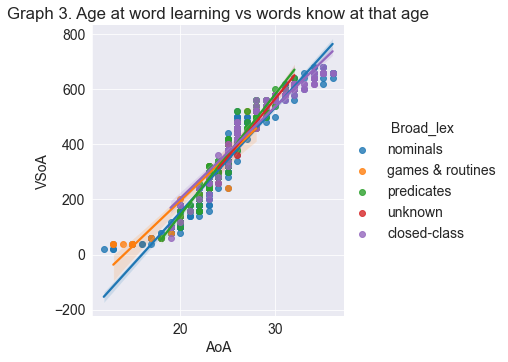

In [52]:
sns.lmplot(x='AoA', y='VSoA', data=df, hue='Broad_lex');
plt.title("Graph 3. Age at word learning vs words know at that age");

The graph shows the speed at which the mayority of words are learned in the interval of the 18 to 30 months

### Questions

What are the first words of norwegian children?

In [53]:
# Interval taken was one months from first word as per regular developmental milestons (acording to denver's charts).
age_of_first_word = df.AoA.min()
df[df.AoA.between(age_of_first_word, age_of_first_word+1)].sort_values(by='AoA')

,Translation,AoA,VSoA,Lex_cat,Broad_lex,Freq,CDS_freq
370,mommy,12.0,20.0,people,nominals,36751.0,171.0
2,vroom,13.0,20.0,sound effects,nominals,17.0,20.0
8,yum yum,13.0,40.0,sound effects,nominals,35.0,19.0
379,daddy,13.0,20.0,people,nominals,24689.0,118.0
394,hi,13.0,40.0,games & routines,games & routines,64086.0,74.0
409,thank you,13.0,40.0,games & routines,games & routines,106589.0,106.0


What is the distribution of the learned words by their broad speach category?

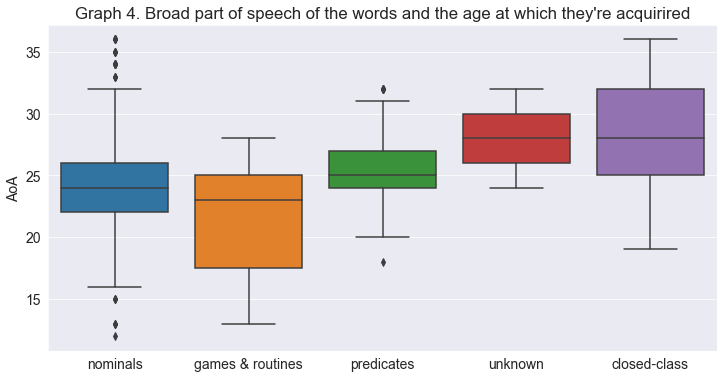

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Broad_lex'], y=df['AoA']).set(xlabel=None);
plt.title("Graph 4. Broad part of speech of the words and the age at which they're acquirired");

Above we see the distribution of words at their acquisition age by the broad part of speech they belong to. It appears the first words of children are nominals but then they quickly learn about their daily life and only later they start learning other parts of speech like pronouns and word connectors (closed-class items)

What is the distribution of the learned words by their specific speach category?

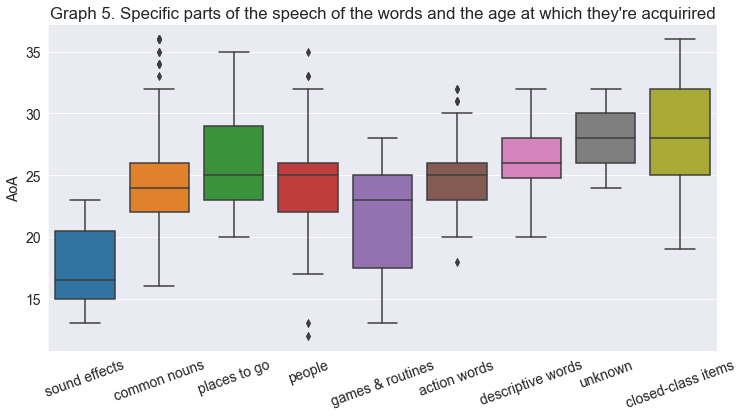

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Lex_cat'], y=df['AoA']).set(xlabel=None)
plt.xticks(rotation=20)
plt.title("Graph 5. Specific parts of the speech of the words and the age at which they're acquirired");

Here we see the specific part of speech the learned words belong to. Its interesting to see that those nominals they learned are actually of the poeple that care for them (mommy and daddy) but they restart learning people's names only after 16 months, a difference of 4 months which is a lot from the developmental point of view. Then we can also observe that most other nominals are learned after the child is 2 years of age, while their daily lifes.

In [56]:
# let's build a matrix to plot the AoA to the broad part of speech
aoa_matrix_lex = pd.crosstab(index=df['Lex_cat'], columns=df['AoA'])

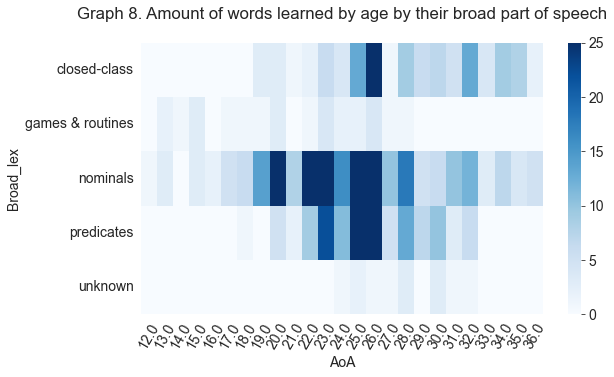

In [57]:
aoa_matrix_broad = pd.crosstab(index=df['Broad_lex'], columns=df['AoA'])
sns.heatmap(aoa_matrix_broad, cmap="Blues", vmin=0, vmax=25);
plt.xticks(rotation=60);
plt.title("Graph 8. Amount of words learned by age by their broad part of speech\n");

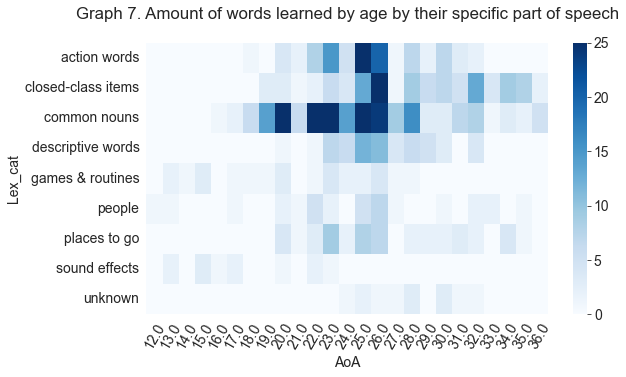

In [58]:
sns.heatmap(aoa_matrix_lex, cmap="Blues", vmin=0, vmax=25);
plt.xticks(rotation=60);
plt.title("Graph 7. Amount of words learned by age by their specific part of speech\n");

What is the difference in VSoA at age 17 months (pre explosion) vs 25 (At the median of learned words)

In [59]:
vsoa_mean_17 = round(df[df.AoA == 17.0].VSoA.mean(), 2)
vsoa_mean_25 = round(df[df.AoA == 25.0].VSoA.mean(), 2)

print(f"At 17 months children know a mean of {vsoa_mean_17}.\n"
      f"At 25 months children know a mean of {vsoa_mean_25}\n"
      f"The difference is {round(vsoa_mean_25-vsoa_mean_17, 2)}\n"
      f"This difference happens in the span of only {25-17} months.")

At 17 months children know a mean of 56.67.
At 25 months children know a mean of 355.38
The difference is 298.71
This difference happens in the span of only 8 months.


The above calculation shows how impressive is the development of language in children, they go the first 12 months without speaking and then in a matter of only a couple of months they are able to express feelings, interact verbally with other, and know their world by name!

# Brysbaert Dataset

In [60]:
df_Brysbaert = pd.read_excel("13428_2013_403_MOESM1_ESM.xlsx")
df_Brysbaert

,Word,Bigram,Conc.M,Conc.SD,Unknown,Total,Percent_known,SUBTLEX
0,a,0,1.46,1.14,2,30,0.9333,1041179
1,aardvark,0,4.68,0.86,0,28,1.0000,21
2,aback,0,1.65,1.07,4,27,0.8519,15
3,abacus,0,4.52,1.12,2,29,0.9310,12
4,abandon,0,2.54,1.45,1,27,0.9630,413
...,...,...,...,...,...,...,...,...
39949,zebra crossing,1,4.56,0.75,1,28,0.9643,0
39950,zero tolerance,1,2.21,1.45,0,29,1.0000,0
39951,ZIP code,1,3.77,1.59,0,30,1.0000,0
39952,zoom in,1,3.57,1.40,0,28,1.0000,0


- Word: the word
- Bigram: whether it is a single word or a two-word expression
- Conc.M: the mean concreteness rating
- Conc.SD: the standard deviation of the concreteness rating
- Unknown: the number of persons indicating they did not know the word
- Total: the total number of persons who rated the word
- Percent_known: percentage participants who knew the word
- SUBTLEX: the SUBTLEX-US frequency count

In [73]:
df_final = pd.merge(df, df_Brysbaert, left_on='Translation', right_on='Word', how='inner').drop('Translation', axis=1)
cols = list(df_final)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Word')))
# use ix to reorder
df_final = df_final.loc[:, cols]
#drop useless columns
df_final.drop(columns=['Bigram', 'Unknown', 'Total', 'Percent_known'], inplace=True)

df_final

,Word,AoA,VSoA,Lex_cat,Broad_lex,Freq,CDS_freq,Conc.M,Conc.SD,SUBTLEX
0,ouch,16.0,40.0,sound effects,nominals,4.3660e+03,7.0,2.76,1.43,559
1,meow,17.0,60.0,sound effects,nominals,2.1400e+02,7.0,3.92,1.41,150
2,moo,15.0,40.0,sound effects,nominals,8.0000e+00,7.0,3.40,1.59,106
3,oh,20.0,80.0,sound effects,nominals,5.0190e+03,437.0,1.48,0.95,167781
4,duck,24.0,240.0,common nouns,nominals,3.5472e+05,4.0,4.86,0.52,1263
...,...,...,...,...,...,...,...,...,...,...
577,because,34.0,640.0,closed-class items,closed-class,3.2097e+05,12.0,1.22,0.51,54622
578,if,35.0,660.0,closed-class items,closed-class,4.9853e+05,86.0,1.19,0.56,180610
579,but,33.0,600.0,closed-class items,closed-class,3.0154e+06,444.0,2.04,1.34,225291
580,and,25.0,400.0,closed-class items,closed-class,1.6080e+07,1074.0,1.52,1.09,682780


The concreteness rating is on a 5-point rating scale, we will follow Ponari et al. (2017) method of considering words with a concreteness rating ≥ 3 as concrete and words with a concreteness rating of < 3 as abstract.

In [75]:
df_final['Conc.M'].describe()

count    582.0000
mean       3.9724
std        1.1028
min        1.1200
25%        3.1325
50%        4.5000
75%        4.8800
max        5.0000
Name: Conc.M, dtype: float64

In [81]:
def label_race (row):
    if row['Conc.M'] >= 3 :
        return 'Concrete'
    if row['Conc.M'] < 3:
        return 'Abstract'

df_final.apply(lambda row: label_race(row), axis=1)
df_final['Concreteness'] = df_final.apply (lambda row: label_race(row), axis=1)
df_final

,Word,AoA,VSoA,Lex_cat,Broad_lex,Freq,CDS_freq,Conc.M,Conc.SD,SUBTLEX,Concreteness
0,ouch,16.0,40.0,sound effects,nominals,4.3660e+03,7.0,2.76,1.43,559,Abstract
1,meow,17.0,60.0,sound effects,nominals,2.1400e+02,7.0,3.92,1.41,150,Concrete
2,moo,15.0,40.0,sound effects,nominals,8.0000e+00,7.0,3.40,1.59,106,Concrete
3,oh,20.0,80.0,sound effects,nominals,5.0190e+03,437.0,1.48,0.95,167781,Abstract
4,duck,24.0,240.0,common nouns,nominals,3.5472e+05,4.0,4.86,0.52,1263,Concrete
...,...,...,...,...,...,...,...,...,...,...,...
577,because,34.0,640.0,closed-class items,closed-class,3.2097e+05,12.0,1.22,0.51,54622,Abstract
578,if,35.0,660.0,closed-class items,closed-class,4.9853e+05,86.0,1.19,0.56,180610,Abstract
579,but,33.0,600.0,closed-class items,closed-class,3.0154e+06,444.0,2.04,1.34,225291,Abstract
580,and,25.0,400.0,closed-class items,closed-class,1.6080e+07,1074.0,1.52,1.09,682780,Abstract


In [92]:
def label_race_binary (row):
    if row['Conc.M'] >= 3 :
        return 1
    if row['Conc.M'] < 3:
        return 0

df_final.apply(lambda row: label_race_binary(row), axis=1)
df_final['Concreteness Binary'] = df_final.apply (lambda row: label_race_binary(row), axis=1)
df_final

,Word,AoA,VSoA,Lex_cat,Broad_lex,Freq,CDS_freq,Conc.M,Conc.SD,SUBTLEX,Concreteness,Concreteness Binary
0,ouch,16.0,40.0,sound effects,nominals,4.3660e+03,7.0,2.76,1.43,559,Abstract,0
1,meow,17.0,60.0,sound effects,nominals,2.1400e+02,7.0,3.92,1.41,150,Concrete,1
2,moo,15.0,40.0,sound effects,nominals,8.0000e+00,7.0,3.40,1.59,106,Concrete,1
3,oh,20.0,80.0,sound effects,nominals,5.0190e+03,437.0,1.48,0.95,167781,Abstract,0
4,duck,24.0,240.0,common nouns,nominals,3.5472e+05,4.0,4.86,0.52,1263,Concrete,1
...,...,...,...,...,...,...,...,...,...,...,...,...
577,because,34.0,640.0,closed-class items,closed-class,3.2097e+05,12.0,1.22,0.51,54622,Abstract,0
578,if,35.0,660.0,closed-class items,closed-class,4.9853e+05,86.0,1.19,0.56,180610,Abstract,0
579,but,33.0,600.0,closed-class items,closed-class,3.0154e+06,444.0,2.04,1.34,225291,Abstract,0
580,and,25.0,400.0,closed-class items,closed-class,1.6080e+07,1074.0,1.52,1.09,682780,Abstract,0


- Word: the English translation of the Norwegian word
- AoA: how old a child generally is was when they this this word, in months (Estimated from the MacArthur-Bates Communicative Development Inventories)
- VSoA: how many other words a child generally knows when they learn this word (rounded up to the nearest 10)
- Lex_cat: the specific part of speech of the word
- Broad_lex: the broad part of speech of the word
- Freq: a measure of how commonly this word occurs in Norwegian
- CDS_Freq: a measure of how commonly this word occurs when a Norwegian adult is talking to a Norwegian child
- Conc.M: the mean concreteness rating
- Conc.SD: the standard deviation of the concreteness rating
- SUBTLEX: the SUBTLEX-US frequency count
- Concreteness: whether a word is concrete or abstract based on a 5-point rating scale

In [86]:
df_final['Concreteness'].value_counts()

Concrete    452
Abstract    130
Name: Concreteness, dtype: int64

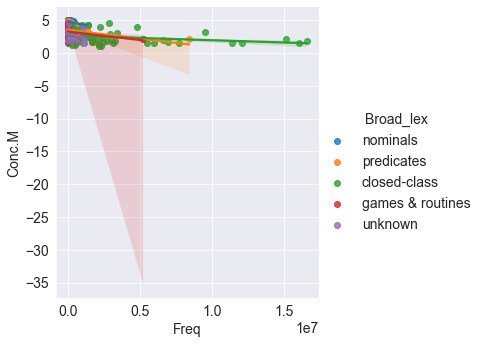

In [89]:
sns.lmplot(x='Freq', y='Conc.M', data=df_final, hue='Broad_lex');

<AxesSubplot:xlabel='Freq', ylabel='Conc.M'>

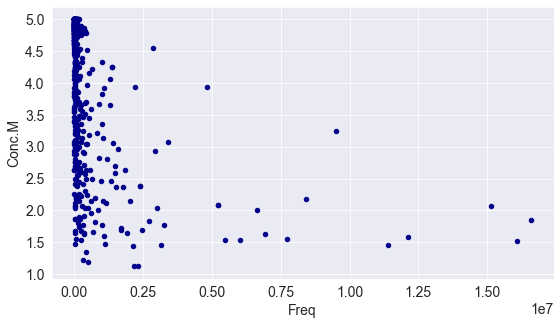

In [90]:
df_final.plot.scatter(x='Freq', y='Conc.M', c='DarkBlue')

<AxesSubplot:xlabel='Freq', ylabel='Concreteness Binary'>

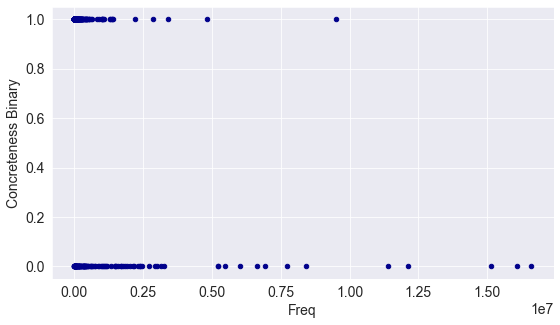

In [93]:
df_final.plot.scatter(x='Freq', y='Concreteness Binary', c='DarkBlue')

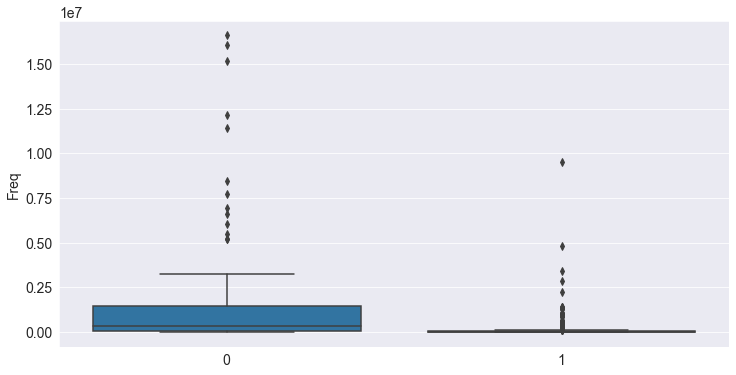

In [94]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_final['Concreteness Binary'], y=df_final['Freq']).set(xlabel=None);

# Model

In [108]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
tqdm.pandas()

from lightgbm import LGBMRegressor
from sklearn import model_selection
from sklearn import metrics

import string
from nltk.corpus import stopwords

In [109]:
# split the corpus in a training (70%), development (15%) and test set (15%)
train = df_final[:int(np.round(len(df_final)*0.7))]
dev = df_final[int(np.round(len(df_final)*0.7)):int(np.round(len(df_final)*0.85))]
test = df_final[int(np.round(len(df_final)*0.85)):]

In [100]:
#check correlations

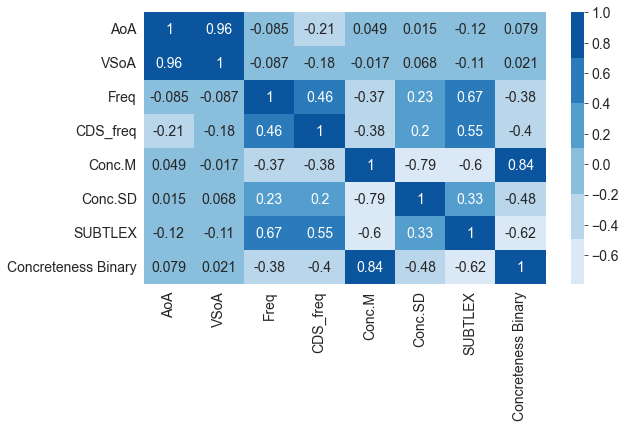

In [112]:
colormap = sns.color_palette("Blues")
sns.heatmap(train.corr(), annot=True, cmap=colormap);

In [118]:
import operator
import numpy as np
from collections import defaultdict

class LM(object):
    
    
    
    def __init__(self, df, ngram_size=2, bos='+', eos='#', k=0.01, 
                 key_col='Word', value_col='Freq', tokens=True):
        
        """
        :param df: Pandas DataFrame
        :param ngram_size: Integer
        :param k: Integer
        :param bos: String
        :param eos: String
        
        This class creates an LM object with attributes         
        df, ngram_size, bos, eos, tokesn, types2freq, vocab, vocab_size
        """
        
        self.k = k
        self.ngram_size = ngram_size
        self.bos = bos
        self.eos = eos
        self.df = df
        self.tokens = tokens
        self.types2freq = self.map_types2frequency(key_col, value_col)
        self.vocab = self.get_vocab()
        self.vocab.add(self.eos)
        self.vocab_size = len(self.vocab)
        
    def map_types2frequency(self, key_col, value_col):
        
        """
        :param key_col: String
        :param target_col: String
        :return: Dictionary
        
        This method derives derives a dictionary that maps words and their frequency count.
        """
        
        return pd.Series(self.df[value_col].values, index=self.df[key_col]).to_dict()
        
    def get_vocab(self):
        
        """
        :return: Set (sequence of iterable elements)
        
        This method derives the vocabulary, with each word in lower case.
        """
                
        return set(char for string in self.types2freq.keys() for char in string.lower())
                    
    def update_counts(self):
        
        """
        :return: Dictionary
        
        This method creates ...
        """
        
        # 
        r = 1 if self.ngram_size == 1 else self.ngram_size - 1
        
        # 
        self.counts = defaultdict(dict) if self.ngram_size > 1 else dict()
        
        # [Explain what happens in the for loop]
        for word_type, freq in self.types2freq.items():
            
            #
            count = freq if self.tokens else 1
            
            # 
            string = self.bos*r + word_type.lower() + self.eos
            
            # [Explain what happens in the for loop]
            for idx in range(self.ngram_size-1, len(string)):
                
                ngram = self.get_ngram(string, idx)
                
                if self.ngram_size == 1:
                    self.counts[ngram] += count
                else:
                    # [explain what happens in the Try/Except block]
                    try:
                        self.counts[ngram[0]][ngram[1]] += count
                    except KeyError:
                        self.counts[ngram[0]][ngram[1]] = count
                        
    def get_ngram(self, string, i):
        
        """
        :param string: String
        :param i: Integer
        :return: Tuple
        
        This method returns a tuple of the history of an ngram 
        and target. 
        """
        
        if self.ngram_size == 1:
            # if the size of the ngram is one, then return the string at index i
            return string[i]
        else:
            # [Explain what happens in the following three lines]
            ngram = string[i-(self.ngram_size-1):i+1]
            history = tuple(ngram[:-1])
            target = ngram[-1]
            return (history, target)
    
    def get_unigram_probability(self, ngram):
        
        """
        :param ngram: String
        :return: Float
        
        This method returns probability of a unigram by dividing the number of 
        ngrams and the total size of the vocabulary
        """
        
        # 
        tot = sum(list(self.counts.values())) + (self.vocab_size*self.k)
        
        # [Explain what happens in the Try/Except block]
        try:
            ngram_count = self.counts[ngram] + self.k
        except KeyError:
            ngram_count = self.k
        
        return ngram_count/tot
    
    def get_ngram_probability(self, history, target):
        
        """
        :param history: Tuple
        :param target: String
        :return: Float
        
        This method returns the probability
        of an ngram with the local history
        """
        
        try:
            # 
            ngram_tot = np.sum(list(self.counts[history].values())) + (self.vocab_size*self.k)
            # [Explain what happens in the following Try/Except block]
            try:
                transition_count = self.counts[history][target] + self.k
            except KeyError:
                # 
                transition_count = self.k
        except KeyError:
            # [Expplain the two following lines]
            transition_count = self.k
            ngram_tot = self.vocab_size*self.k
        
        # return the probability of finding the target given the history
        return transition_count/ngram_tot 
    
    def perplexity(self, string):
        
        """
        :param string: String
        :return: Float
        
        This method computes perplexity of a string
        """
        
        r = 1 if self.ngram_size == 1 else self.ngram_size - 1
        string = self.bos*r + string + self.eos
        

        probs = []
        for idx in range(self.ngram_size-1, len(string)):
            ngram = self.get_ngram(string, idx)
            # [Explain what happens in the If-Else block]
            if self.ngram_size == 1:
                probs.append(self.get_unigram_probability(ngram))
            else:
                probs.append(self.get_ngram_probability(ngram[0], ngram[1]))
                    
        # 
        entropy = np.log2(probs)
        
        # 
        avg_entropy = -1 * (sum(entropy) / len(entropy))
        
        # 
        return pow(2.0, avg_entropy)
    
    def generate(self, limit=50, max_prob=True):
    
        """
        :param limit: Int
        :param max_prob: Bool
        :return: String
        
        This method generates the likeliest string. 
        """
    
        i = 0
        r = 1 if self.ngram_size == 1 else self.ngram_size - 1
        #
        word = [self.bos]*r
        #
        current = word[-(self.ngram_size-1):]
            
        while i < limit:

            characters = []
            probabilities = []
            # 
            continuations = self.counts if self.ngram_size == 1 else self.counts[tuple(current)]
            if max_prob:
                # 
                new = sorted(
                    continuations.items(), key=operator.itemgetter(1), reverse=True
                )[0][0]
            else:
                # 
                tot = sum(list(continuations.values()))
                # 
                for char, v in continuations.items():
                    characters.append(char)
                    probabilities.append(v/tot)
        
                # 
                new = np.random.choice(characters, size=1, p=probabilities)[0]
        
            # [Explain the following If-Else block]
            if new != self.eos: 
                word.append(new) 
            else: 
                return ''.join(word[self.ngram_size-1:])
        
            # 
            current = word[-(self.ngram_size-1):]   
            i += 1
    
        # 
        
        return ''.join(word[self.ngram_size-1:])

## Language models
training 3 language models:
- 2gram type based
- 3gram type based
- 4gram type based

In [124]:
def sample_ngram2(lm):

    ngrams = []
    for idx, key in enumerate(lm.keys()):  
        if idx % int(len(lm)/5) == 0:    
            ngram = key[0] + list(lm[key].keys())[0]                                      
            ngrams.append(ngram)
    return ngrams

# instantiate the 2gram, type-based LM here and show the required details

ngram_model_type2 = LM(df_final, ngram_size = 2, tokens = False)
print('Vocabulary size:',ngram_model_type2.vocab_size)
ngram_model_type2.update_counts()

count_type2 = 0
for idx, key in enumerate(ngram_model_type2.counts.keys()):
    count_type2 += len(ngram_model_type2.counts[key])
print('Number of ngrams:',count_type2)

print('Sample ngrams:', sample_ngram2(ngram_model_type2.counts))

print('Perplexity of computational:', ngram_model_type2.perplexity('computational'))

Vocabulary size: 29
Number of ngrams: 350
Sample ngrams: ['+o', 'me', 'nk', 'im', 't#', 'ju']
Perplexity of computational: 15.216874358542064


In [119]:
# usual import of what we'll need
import nltk
import numpy as np
from collections import Counter, defaultdict

def sample_ngram3(lm):

    ngrams = []
    for idx, key in enumerate(lm.keys()):  
        if idx % int(len(lm)/5) == 0:    
            ngram = key[0] + key[1] + list(lm[key].keys())[0]                                      
            ngrams.append(ngram)
    return ngrams

# instantiate the 3gram, type-based LM here and show the required details

ngram_model_type3 = LM(df_final, ngram_size = 3, tokens = False)
print('Vocabulary size:',ngram_model_type3.vocab_size)
ngram_model_type3.update_counts()

count_type3 = 0
for idx, key in enumerate(ngram_model_type3.counts.keys()):
    count_type3 += len(ngram_model_type3.counts[key])
print('Number of ngrams:',count_type3)

print('Sample ngrams:', sample_ngram3(ngram_model_type3.counts))

print('Perplexity of computational:', ngram_model_type3.perplexity('computational'))

Vocabulary size: 29
Number of ngrams: 1275
Sample ngrams: ['++o', '+ho', 'upp', 'e c', 'pki', 'rwa']
Perplexity of computational: 20.794203094334673


In [123]:
def sample_ngram4(lm):

    ngrams = []
    for idx, key in enumerate(lm.keys()):  
        if idx % int(len(lm)/5) == 0:    
            ngram = key[0] + key[1] + key[2] + list(lm[key].keys())[0]                                      
            ngrams.append(ngram)
    return ngrams

ngram_model_type4 = LM(df_final, ngram_size = 4, tokens = False)
print('Vocabulary size:',ngram_model_type4.vocab_size)
ngram_model_type4.update_counts()

count_type4 = 0
for idx, key in enumerate(ngram_model_type4.counts.keys()):
    count_type4 += len(ngram_model_type4.counts[key])
print('Number of ngrams:',count_type4)

print('Sample ngrams:', sample_ngram4(ngram_model_type4.counts))

print('Perplexity of computational:', ngram_model_type4.perplexity('computational'))


Vocabulary size: 29
Number of ngrams: 1871
Sample ngrams: ['+++o', 'cle#', '+zip', 'itch', 'shar', 'caus']
Perplexity of computational: 7.729004785948314


Generating the likeliest string

In [125]:
data={'n-gram size':[2,3,4],'word': [ngram_model_type2.generate(50, max_prob=True),
              ngram_model_type3.generate(50, max_prob=True), ngram_model_type4.generate(50, max_prob=True)]}

df=pd.DataFrame(data)

df

,n-gram size,word
0,2,s
1,3,ster
2,4,stroller


words with lowest perplexity for words of 3, 8 and 13 letters

In [129]:
#type 2

perplexity_type2 = []
for i in df_final['Word']:
    perp_type2 = ngram_model_type2.perplexity(i)
    perplexity_type2.append(perp_type2)

df_type2 = df_final['Word'].copy()
df_type2 = pd.DataFrame(df_type2)
df_type2['perplexity'] = perplexity_type2

#type 3

perplexity_type3 = []
for i in df_final['Word']:
    perp_type3 = ngram_model_type3.perplexity(i)
    perplexity_type3.append(perp_type3)

df_type3 = df_final['Word'].copy()
df_type3 = pd.DataFrame(df_type3)
df_type3['perplexity'] = perplexity_type3

# type 4    
    
perplexity_type4 = []
for i in df_final['Word']:
    perp_type4 = ngram_model_type4.perplexity(i)
    perplexity_type4.append(perp_type4)
    
df_type4 = df_final['Word'].copy()
df_type4 = pd.DataFrame(df_type4)
df_type4['perplexity'] = perplexity_type4

#finding the words with the correct length and the lowest perplexity and putting them in a dataframe

## len 3

#type 4
df1 = df_type4[df_type4['Word'].map(len) == 3].sort_values(by=['perplexity'], ascending= True).head(1)
df1['n-gram size'] = 4
df1['token-based'] = 'False'

#type 3
df2 = df_type3[df_type3['Word'].map(len) == 3].sort_values(by=['perplexity'], ascending= True).head(1)
df2['n-gram size'] = 3
df2['token-based'] = 'False'

#type 2
df3 = df_type2[df_type2['Word'].map(len) == 3].sort_values(by=['perplexity'], ascending= True).head(1)
df3['n-gram size'] = 2
df3['token-based'] = 'False'


## len 8

#type 4
df4 = df_type4[df_type4['Word'].map(len) == 8].sort_values(by=['perplexity'], ascending= True).head(1)
df4['n-gram size'] = 4
df4['token-based'] = 'False'

#type 3
df5 = df_type3[df_type3['Word'].map(len) == 8].sort_values(by=['perplexity'], ascending= True).head(1)
df5['n-gram size'] = 3
df5['token-based'] = 'False'

#type 3
df6 = df_type2[df_type2['Word'].map(len) == 8].sort_values(by=['perplexity'], ascending= True).head(1)
df6['n-gram size'] = 2
df6['token-based'] = 'False'


## len 13

#type 4
df7 = df_type4[df_type4['Word'].map(len) == 13].sort_values(by=['perplexity'], ascending= True).head(1)
df7['n-gram size'] = 4
df7['token-based'] = 'False'

#type 3
df8 = df_type3[df_type3['Word'].map(len) == 13].sort_values(by=['perplexity'], ascending= True).head(1)
df8['n-gram size'] = 3
df8['token-based'] = 'False'

#type 2
df9 = df_type2[df_type2['Word'].map(len) == 13].sort_values(by=['perplexity'], ascending= True).head(1)
df9['n-gram size'] = 2
df9['token-based'] = 'False'


frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9]
perplexities = pd.concat(frames)
perplexities = perplexities[['Word', 'n-gram size', 'token-based', 'perplexity']]
perplexities['perplexity'] = perplexities['perplexity'].round(decimals = 4)
perplexities = perplexities.sort_values(by=['perplexity'], ascending= True)
perplexities.reset_index(drop=True, inplace=True)
perplexities

,Word,n-gram size,token-based,perplexity
0,swimming pool,4,False,2.2291
1,medicine,4,False,2.3568
2,tricycle,3,False,3.9178
3,her,3,False,4.0443
4,swimming pool,3,False,4.3902
5,man,4,False,4.4153
6,she,2,False,5.0699
7,stroller,2,False,8.0263
8,swimming pool,2,False,11.8492
